In [9]:
# imports
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [10]:
# very useful for sorting in natural order and not chronological -> ex: 9, 10, 11, 12, 100, 1000 instead of 9, 10, 100, 1000, 11, 12  
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split("([0-9]+)", key)]
    return sorted(l, key=alphanum_key)

In [11]:
pitch = '50x12P5'
batch_size = '5000'
date = '12Feb2025'
directory = "/home/dajiang/smart-pixels-ml/weights/weights_7pitches/dataset_3sr_cotBeta1P5_weights/weights-{}-bs{}-model_1-{}-checkpoints".format(pitch, batch_size, date)

filenames = natural_sort(os.listdir(directory))

vlosses = [float(f.split("-v")[1].split(".hdf5")[0]) for f in filenames]
tlosses = [float(f.split("-t")[1].split("-v")[0]) for f in filenames]

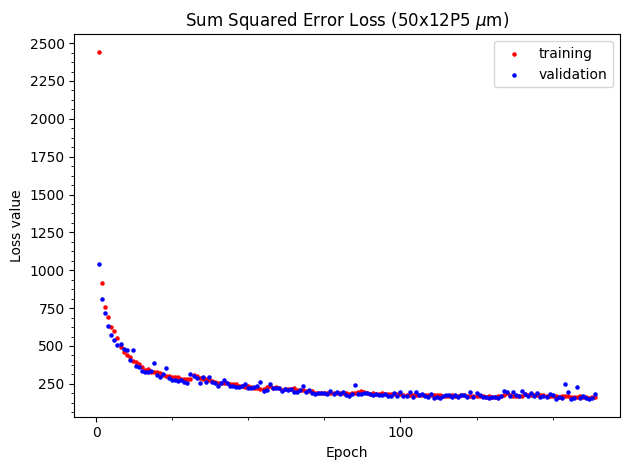

In [12]:
# plot the losses
num_epochs = len(tlosses)
epochs = np.linspace(1,num_epochs,num_epochs)
train = np.array(tlosses)
validation = np.array(vlosses)

fig, ax = plt.subplots()
ax.scatter(epochs,train,s=5,label="training",color="red")
ax.scatter(epochs,validation,s=5,label="validation",color="blue")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss value")
ax.set_title("Sum Squared Error Loss ({} $\mu$m)".format(pitch))
ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(100/4))
ax.yaxis.set_major_locator(MultipleLocator(250))
ax.yaxis.set_minor_locator(MultipleLocator(250/4))
#ax.set_ylim(-40000,0)
#ax.axhline(y=-10000, color="red", linestyle ='dashed', alpha=0.5)
#ax.axhline(y=-20000, color="orange", linestyle ='dashed', alpha=0.5)
#ax.axhline(y=-30000, color="green", linestyle ='dashed', alpha=0.5)

plt.tight_layout()
#fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/loss/loss-{}-bs{}-{}.png'.format(pitch, batch_size, date), dpi=300)